# Setup, imports

In [1]:
# Add the parent directory to path
import sys
sys.path.append('..')

In [2]:
import matplotlib.pyplot as plt
from gym import spaces

"""Environment imports"""
from epidemic_env.env       import Env, Log
from epidemic_env.dynamics  import ModelDynamics, Observation
from epidemic_env.visualize import Visualize
from epidemic_env.agent     import Agent

"""Pytorch and numpy imports"""
import numpy as np
import torch
from torch import nn

%matplotlib inline

['Lausanne', 'Geneva', 'Sion', 'Neuchâtel', 'Basel', 'Bern', 'Lücern', 'St-Gallen', 'Zürich']


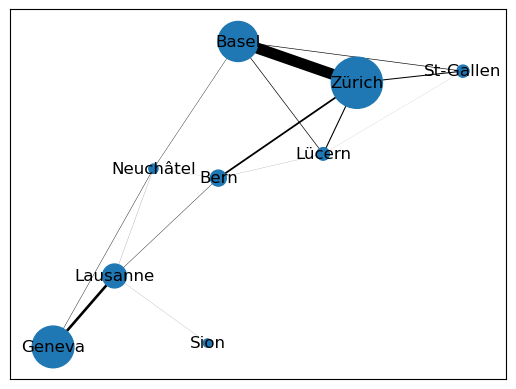

In [3]:
dyn = ModelDynamics('../config/switzerland.yaml')   # load the switzerland map
print(dyn.cities)
dyn.draw_map()

In [4]:
"""Loading the environment"""
env = Env(  dyn, # We pass the dynamical model to the environment 
            action_space=None, # Here one could pass an openai gym action space that can then be sampled
            observation_space=None, # Here one could pass an openai gym obs space that can then be sampled
            )

""" Resetting the environment """
obs, info = env.reset(seed=0) # We pass a seed to the env to ensure reproductibility 

# Part one

In [5]:
action = { # DO NOTHING
        'confinement': False, 
        'isolation': False, 
        'hospital': False, 
        'vaccinate': False,
    }

Text(0.5, 0, 'Weeks')

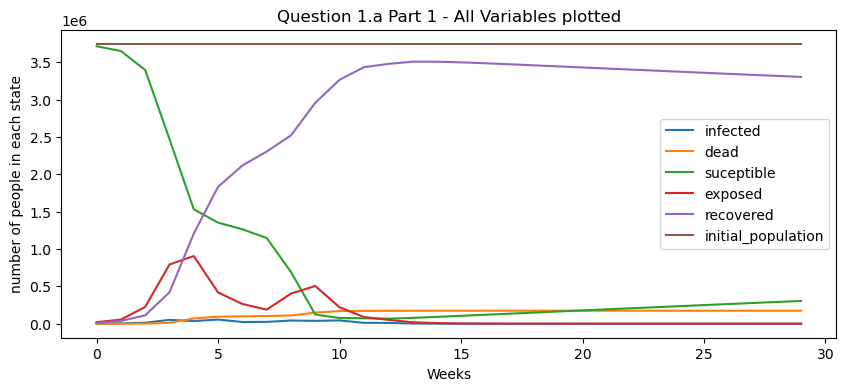

In [6]:
seed = 0
fig, ax = plt.subplots(1,1,figsize=(10,4))

""" Run the simulations, seeded"""

log = []
finished = False
obs, info = env.reset(seed)
for t in range(30):
    obs, R, finished, info = env.step(action)
    log.append(info) # save the information dict for logging
    if finished:
        break
""" Parse the logs """
total = {p:np.array([getattr(l.total,p) for l in log]) for p in dyn.parameters}
cities = {c:{p:np.array([getattr(l.city[c],p) for l in log]) for p in dyn.parameters} for c in dyn.cities}
actions = {a:np.array([l.action[a] for l in log]) for a in log[0].action.keys()}


[ax.plot(y) for y in total.values()]
ax.legend(total.keys())
ax.set_title("Question 1.a Part 1 - All Variables plotted")
ax.set_ylabel('number of people in each state')
ax.set_xlabel('Weeks')


Text(0.5, 0, 'Weeks')

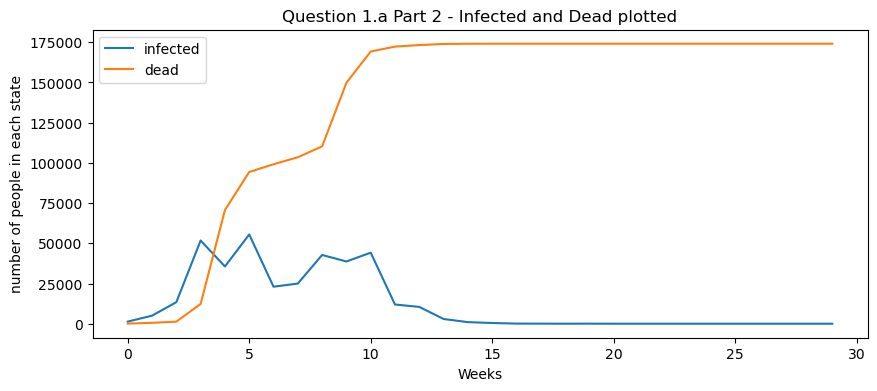

In [7]:
fig, ax = plt.subplots(1,1,figsize=(10,4))


total_tmp = {'infected':total['infected'], 'dead':total['dead']}
[ax.plot(y) for y in total_tmp.values()]
ax.legend(total_tmp.keys())
ax.set_title("Question 1.a Part 2 - Infected and Dead plotted")
ax.set_ylabel('number of people in each state')
ax.set_xlabel('Weeks')

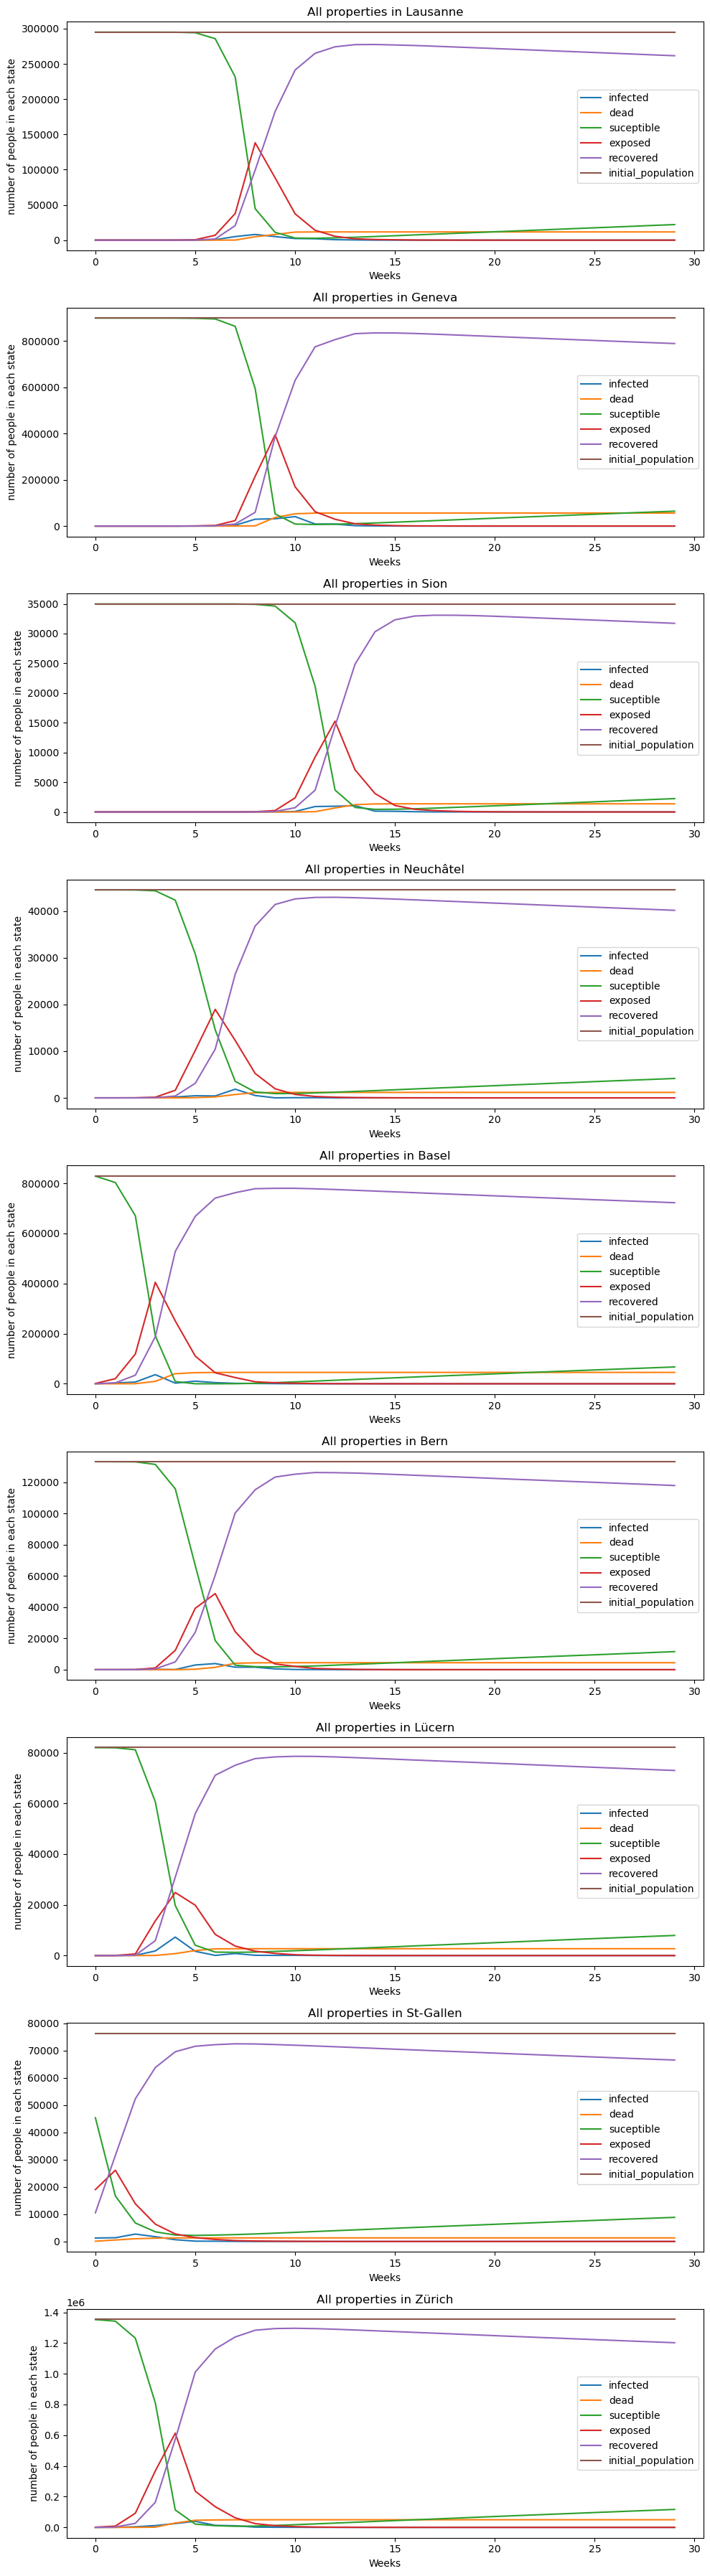

In [8]:
fig, ax = plt.subplots(len(cities),1,figsize=(10,4*len(cities)))

for index, (city, city_total) in enumerate(cities.items()):
    [ax[index].plot(y) for y in city_total.values()]
    ax[index].legend(city_total.keys())
    ax[index].set_title(f"All properties in {city}")
    ax[index].set_ylabel('number of people in each state')
    ax[index].set_xlabel('Weeks')
    
fig.tight_layout()

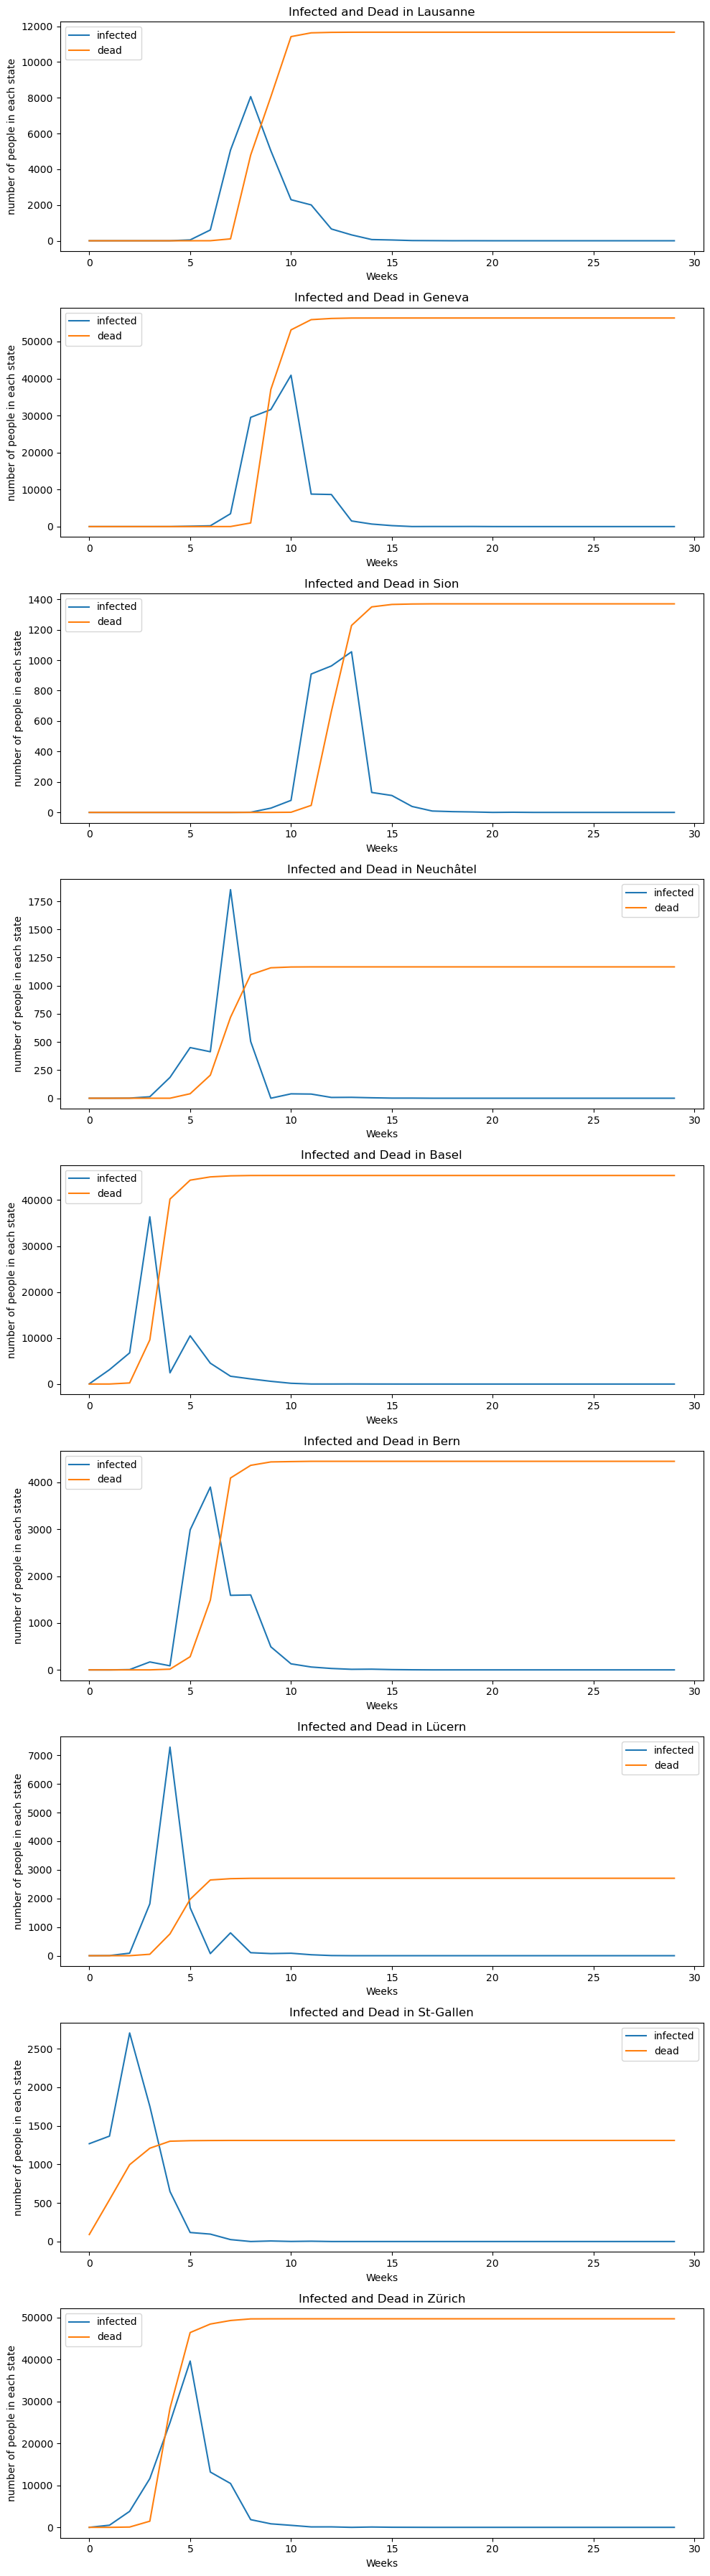

In [62]:
fig, ax = plt.subplots(len(cities),1,figsize=(10,4*len(cities)))

for index, (city, city_total) in enumerate(cities.items()):

    total_tmp = {'infected':city_total['infected'], 'dead':city_total['dead']}
    [ax[index].plot(y) for y in total_tmp.values()]
    ax[index].legend(total_tmp.keys())
    ax[index].set_title(f"Infected and Dead in {city}")
    ax[index].set_ylabel('number of people in each state')
    ax[index].set_xlabel('Weeks')
    
fig.tight_layout()